# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
data = pd.read_csv('C:\Labs\Eksperimen MSML\Gene-Expression-Analysis-and-Disease-Relationship.csv')
data.head()

,PatientID,Age,Gender,Gene_X_Expression,Gene_Y_Expression,SmokingStatus,DiseaseStatus,TreatmentResponse
0,1,45,0,5.78,3.21,1,1,1
1,2,62,1,7.12,5.89,2,2,0
2,3,38,0,3.15,1.98,0,0,2
3,4,55,1,6.54,4.76,1,1,1
4,5,71,0,8.01,6.55,2,2,0


In [3]:
print("\nInformasi Dataset:")
data.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          1000 non-null   int64  
 1   Age                1000 non-null   int64  
 2   Gender             1000 non-null   int64  
 3   Gene_X_Expression  1000 non-null   float64
 4   Gene_Y_Expression  1000 non-null   float64
 5   SmokingStatus      1000 non-null   int64  
 6   DiseaseStatus      1000 non-null   int64  
 7   TreatmentResponse  1000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [4]:
print("\nStatistical Summary:")
display(data.describe(include='all'))


Statistical Summary:


,PatientID,Age,Gender,Gene_X_Expression,Gene_Y_Expression,SmokingStatus,DiseaseStatus,TreatmentResponse
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.631000,0.50000,3.92314,3.62837,0.058000,0.058000,1.942000
std,288.819436,17.608774,0.50025,2.00056,1.94636,0.307784,0.307784,0.307784
min,1.000000,20.000000,0.00000,0.51000,0.30000,0.000000,0.000000,0.000000
25%,250.750000,34.000000,0.00000,2.19750,1.95000,0.000000,0.000000,2.000000
50%,500.500000,49.000000,0.50000,3.88500,3.58500,0.000000,0.000000,2.000000
75%,750.250000,65.000000,1.00000,5.61250,5.33000,0.000000,0.000000,2.000000
max,1000.000000,80.000000,1.00000,9.01000,7.55000,2.000000,2.000000,2.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

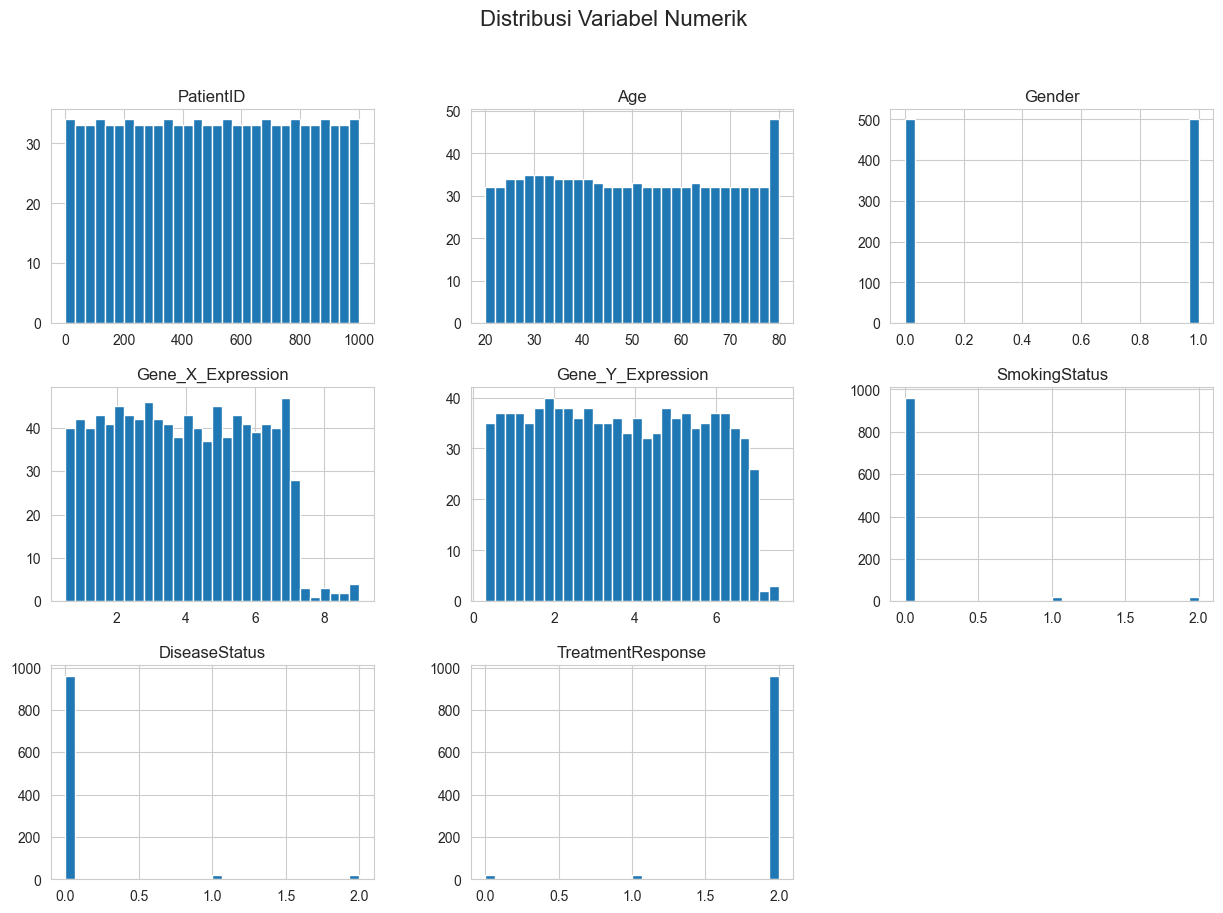

In [5]:
# Visualisasi Distribusi untuk Kolom Numerik
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribusi Variabel Numerik", fontsize=16)
plt.show()

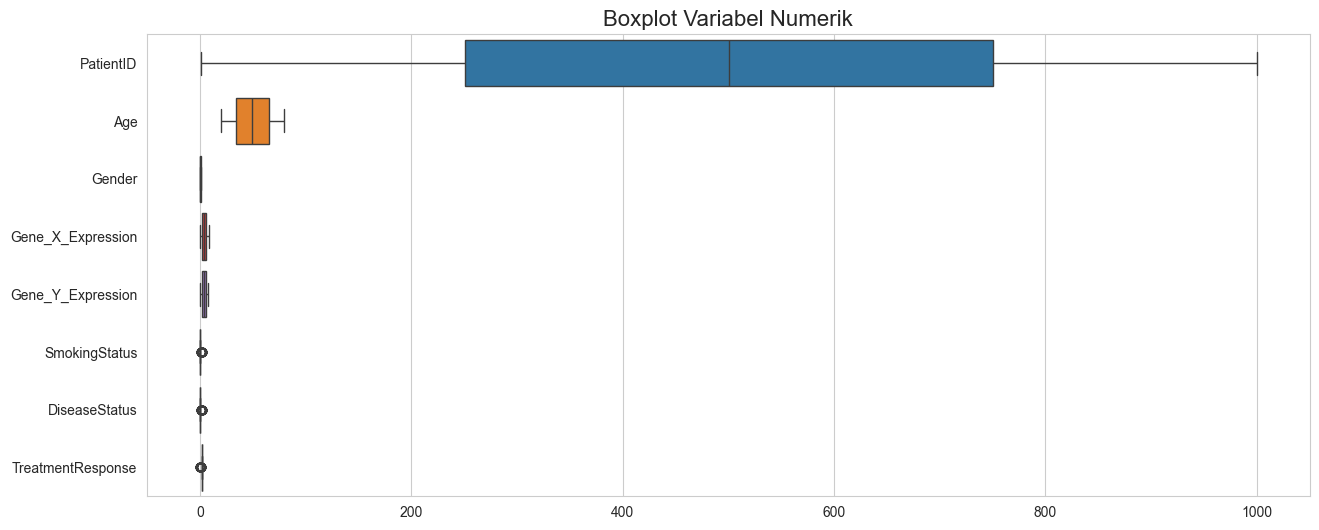

In [6]:
# Boxplot untuk mendeteksi Outlier
plt.figure(figsize=(15, 6))
sns.boxplot(data=data[num_cols], orient="h")
plt.title("Boxplot Variabel Numerik", fontsize=16)
plt.show()

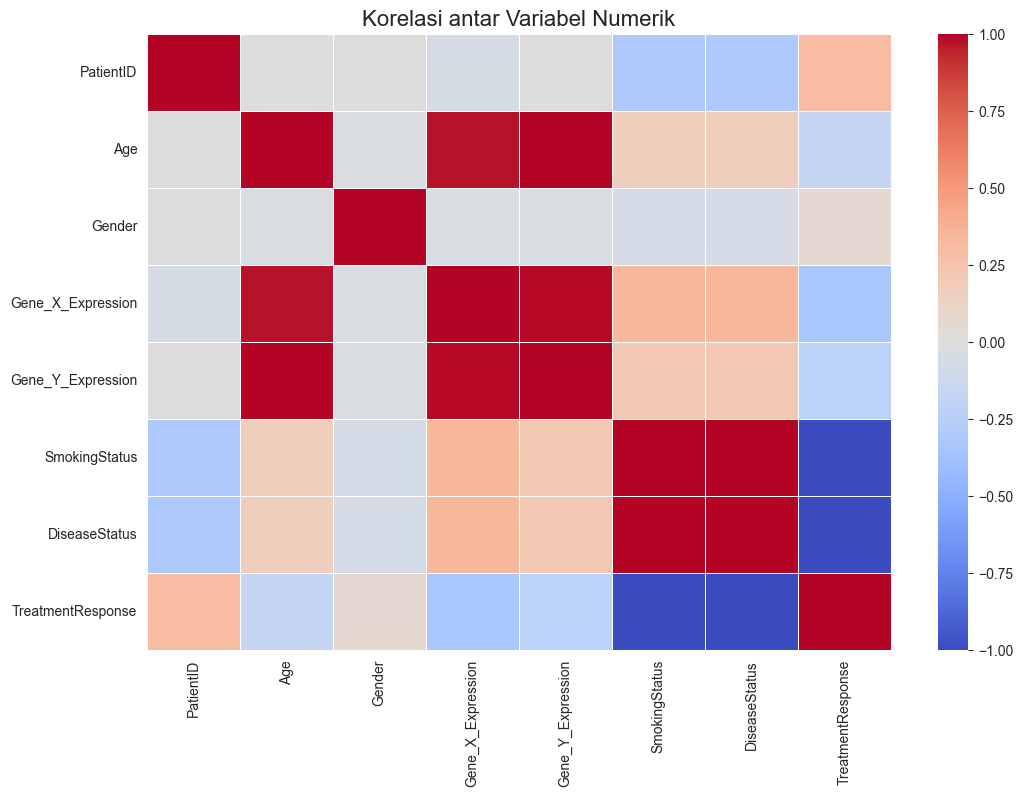

In [7]:
# Heatmap Korelasi antar Variabel Numerik
plt.figure(figsize=(12, 8))
corr = data[num_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi antar Variabel Numerik", fontsize=16)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# Hapus Kolom Identifier (PatientID)
data.drop(columns=["PatientID"], inplace=True)

In [9]:
# Informasi Dasar
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1000 non-null   int64  
 1   Gender             1000 non-null   int64  
 2   Gene_X_Expression  1000 non-null   float64
 3   Gene_Y_Expression  1000 non-null   float64
 4   SmokingStatus      1000 non-null   int64  
 5   DiseaseStatus      1000 non-null   int64  
 6   TreatmentResponse  1000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 54.8 KB
None
               Age      Gender  Gene_X_Expression  Gene_Y_Expression  \
count  1000.000000  1000.00000         1000.00000         1000.00000   
mean     49.631000     0.50000            3.92314            3.62837   
std      17.608774     0.50025            2.00056            1.94636   
min      20.000000     0.00000            0.51000            0.30000   
25%      34.000000     0.00000            2.197

In [10]:
# === Cek Missing Values ===
print("\nJumlah Missing Values per Kolom:")
print(data.isnull().sum())


Jumlah Missing Values per Kolom:
Age                  0
Gender               0
Gene_X_Expression    0
Gene_Y_Expression    0
SmokingStatus        0
DiseaseStatus        0
TreatmentResponse    0
dtype: int64


In [11]:
# Menghapus Data Duplikat
print("Jumlah duplikat:", data.duplicated().sum())
data.drop_duplicates(inplace=True)

Jumlah duplikat: 0


In [12]:
# Deteksi Outlier (IQR method pada fitur numerik)
numeric_cols = ["Age", "Gene_X_Expression", "Gene_Y_Expression"]

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
Gene_X_Expression: 0 outliers
Gene_Y_Expression: 0 outliers


In [13]:
# Normalisasi / Standarisasi fitur numerik
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [14]:
# Simpan Hasil Preprocessing
data.to_csv("gene_expression_preprocessed.csv", index=False)
print("Data setelah preprocessing disimpan ke gene_expression_preprocessed.csv")

Data setelah preprocessing disimpan ke gene_expression_preprocessed.csv
